In [15]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
# Load dataset

df = pd.read_excel("iris-dataset.xlsx", header = 0)

data = np.array(df, dtype=np.float32)

y_data = data[:, [-1]]

scaler = MinMaxScaler()
data1 = scaler.fit_transform(df.values)

x_data = data1[:, 0:-1]  

# Dimension reduction by PCA

In [17]:
pca = PCA(n_components = 2)
pca.fit(x_data)
iris_pca = pca.transform(x_data)

pca_columns = ['PC_1', 'PC_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target']=y_data
print (irisDF_pca)

         PC_1      PC_2  target
0   -0.630703  0.107578     0.0
1   -0.622905 -0.104260     0.0
2   -0.669520 -0.051417     0.0
3   -0.654153 -0.102885     0.0
4   -0.648788  0.133488     0.0
..        ...       ...     ...
145  0.551462  0.059841     2.0
146  0.407146 -0.171821     2.0
147  0.447143  0.037560     2.0
148  0.488208  0.149678     2.0
149  0.312066 -0.031130     2.0

[150 rows x 3 columns]


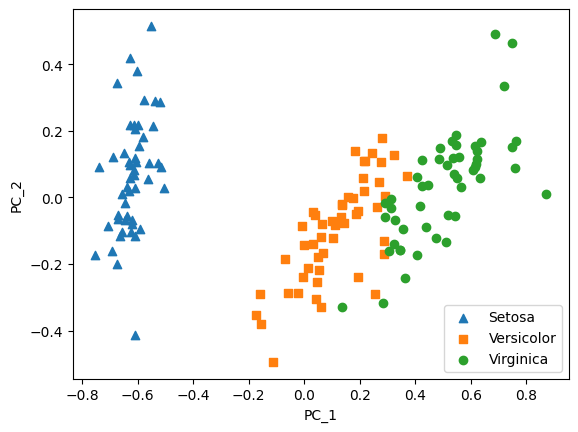

In [18]:
# Scatter plot of PCA results

markers = ['^', 's', 'o']
target_names = ['Setosa','Versicolor','Virginica']

for i, marker in enumerate (markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['PC_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['PC_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = target_names[i])
    
plt.legend()
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.show()

# Dimension reduction by autoencoder

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [20]:
# Encoder 
input_dim = x_data.shape[1]
encoding_dim = 2

encoder = Sequential(name="encoder")
encoder.add(Dense(64, activation='relu', input_shape=(input_dim,)))
encoder.add(Dense(32, activation='relu'))
encoder.add(Dense(encoding_dim, activation='linear')) 

C:\Users\oem\.conda\envs\TF_v3\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Decoder 
decoder = Sequential(name="decoder")
decoder.add(Dense(32, activation='relu', input_shape=(encoding_dim,)))
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(input_dim, activation='linear'))  

In [22]:
# Autoencoder 
input_img = Input(shape=(input_dim,))
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)

In [23]:
# Compile and train
autoencoder.compile(optimizer=Adam(), loss='mse') 

history = autoencoder.fit(x_data, x_data,
                epochs=50,
                batch_size=32,
#                validation_data=(x_test_scaled, x_test_scaled),
                verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2500 
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2092 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1720
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1153
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0767
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0524
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0431
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0336
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0299
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0293
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0255
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━

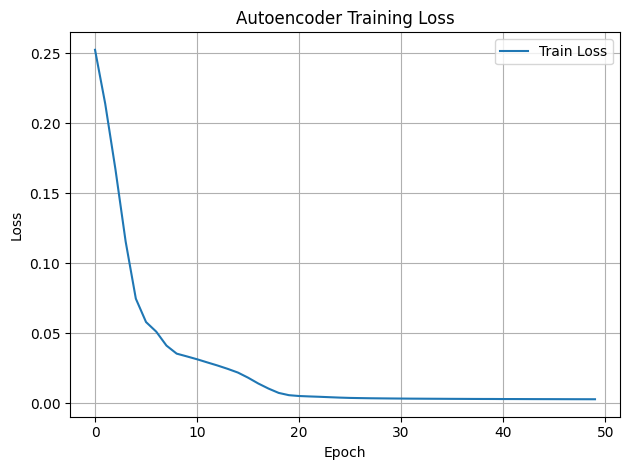

In [24]:
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Encode input data into latent space (2D)

latent_space = encoder.predict(x_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [26]:
z_columns = ['z_1', 'z_2']
irisDF_autoencoder = pd.DataFrame(latent_space, columns = z_columns)

irisDF_autoencoder['target']=y_data
print (irisDF_autoencoder)

          z_1       z_2  target
0   -0.180130  0.332364     0.0
1   -0.117592  0.193735     0.0
2   -0.081572  0.234664     0.0
3   -0.073315  0.196267     0.0
4   -0.168082  0.348957     0.0
..        ...       ...     ...
145 -1.196941 -0.170210     2.0
146 -0.944742 -0.248550     2.0
147 -1.095744 -0.133048     2.0
148 -1.175862 -0.131702     2.0
149 -0.927759 -0.154102     2.0

[150 rows x 3 columns]


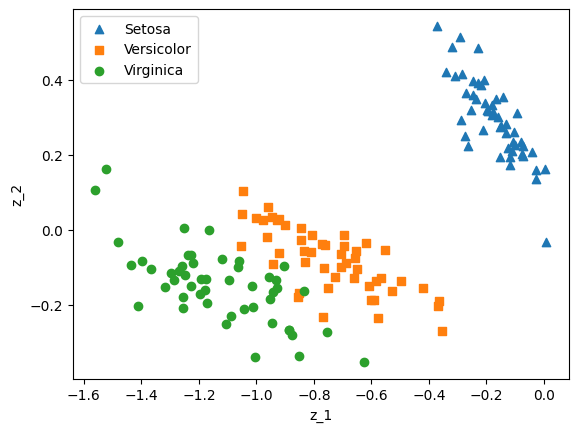

In [27]:
# Scatter plot of Autoencoder results

markers = ['^', 's', 'o']
target_names = ['Setosa','Versicolor','Virginica']

for i, marker in enumerate (markers):
    x_axis_data = irisDF_autoencoder[irisDF_autoencoder['target']==i]['z_1']
    y_axis_data = irisDF_autoencoder[irisDF_autoencoder['target']==i]['z_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = target_names[i])
    
plt.legend()
plt.xlabel('z_1')
plt.ylabel('z_2')
plt.show()